<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/Modul_3_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### PRINCIPAL COMPONENT ANALYSIS

Dataset Description :
- dataset : Breast Cancer
- features : 30 features extracted from images
- you can’t see the hidden structure in the data easily using
data visualization
- if you use scatter plot, This dataset has 30 features, which
would result in 30 * 14 = 420 scatter plots! 

Task :
- Scale the features using Standard Scaler
- Compute how much information extracted using two
components
- Reduce the dimension from 30 to 2 using two components
- Plot the first components and the second components
- x axis first component
- y axis second component
- hue : Diagnosis

Result :
- Information extracted from 2 component 63.24 %
- We reduce the dimension from 30 to 2 and the lost
information is 36.76% but you can see that those two
features can separate benign and malignant quiet well
- this also means that you can see hidden structure within the
data
- malignant points are more spread than benign point

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

1. Scaling

In [ ]:
scaler = StandardScaler()
cancer_scaled = scaler.fit_transform(cancer_df)
cancer_scaled = pd.DataFrame(cancer_scaled, columns=cancer_df.columns)

In [ ]:
cancer_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


2. PCA

In [ ]:
pca = PCA()
pca_features = pca.fit_transform(cancer_scaled)

In [ ]:
var = []
for i in range(0,30):
  var.append(np.var(pca_features[:,i]))

In [ ]:
print('information extracted {} %'.format(np.sum(var[:2])*100/np.sum(var)))

information extracted 63.243207651559416 %


In [ ]:
var = pca.explained_variance_

In [ ]:
print('information extracted {} %'.format(np.sum(var[:2])*100/np.sum(var)))

information extracted 63.24320765155942 %


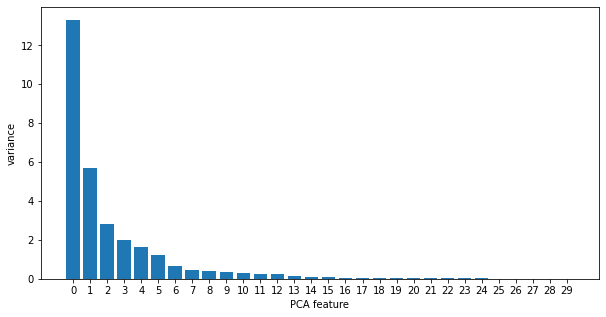

In [ ]:
features = range(pca.n_components_)
plt.figure(figsize=(10,5))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [ ]:
pca = PCA(n_components=2)
pca_feature = pca.fit_transform(cancer_scaled)

Text(0, 0.5, 'second component')

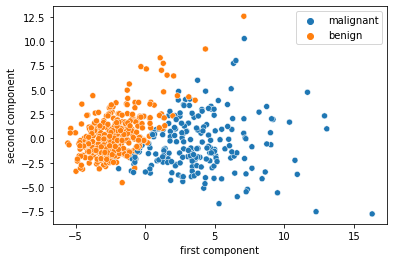

In [ ]:
sns.scatterplot(x=pca_feature[:,0], y=pca_feature[:,1], hue=np.where(cancer.target,  'benign', 'malignant'))
plt.xlabel('first component')
plt.ylabel('second component')

### PYTHON EXERCISE : K-MEANS 1

 Analyze generated data from make_blobs
- set 3 main spot (random_state = 42)
- plot the data using scatter plot
- determine the optimal number of cluster based on your observation
- plot the data and clustering result (optimal number of cluster) using
scatter plot

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(centers=3, random_state=42)

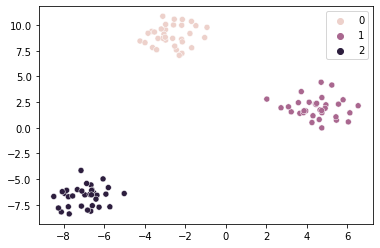

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

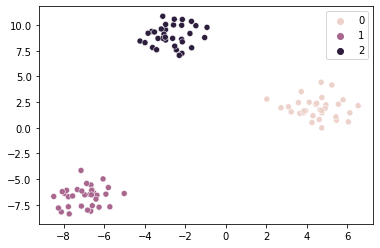

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1], hue=kmeans.labels_)

### PYTHON EXERCISE : K-MEANS 2

 Analyze data “ilustrasi k means.csv”

- plot the data using scatter plot
- determine the optimal number of cluster
  - elbow method
  - silhouette method
- plot the data and clustering result (optimal number of cluster) using
scatter plot

In [ ]:
df = pd.read_csv('ilustrasi k means.csv', sep=';')

In [ ]:
df.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


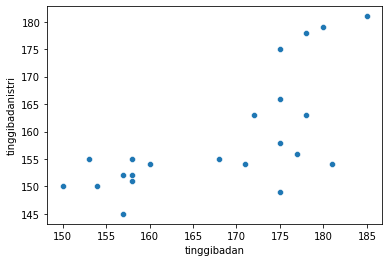

In [ ]:
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', data=df)

Elbow Method

In [ ]:
sse = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df)
  sse.append(kmeans.inertia_)

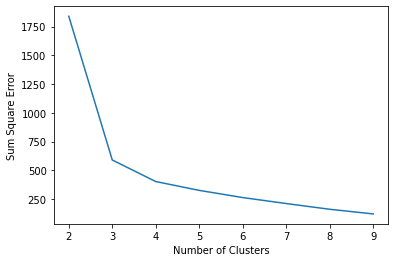

In [ ]:
sns.lineplot(x=range(2,10), y=sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Square Error')
plt.show()

Silhoutte Method

In [ ]:
sil_score = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df)
  sil_score.append(silhouette_score(df, kmeans.labels_, metric='euclidean'))

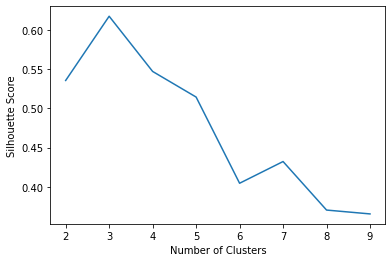

In [ ]:
sns.lineplot(x=range(2,10), y=sil_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

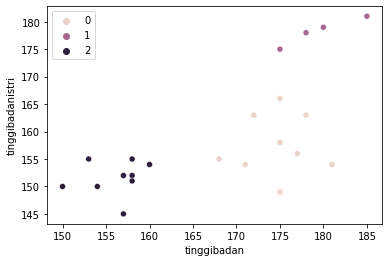

In [ ]:
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', data=df, hue=kmeans.labels_)

### PYTHON EXERCISE : CLUSTERING AGGLOMERATIVE

 Analyze data “ilustrasi k means.csv”
- plot the data using scatter plot
- make dendrograms
  - ward linkage
  - average linkage
  - complete linkage
- Compare the result :
  - is it different ?
  - what about another data ?
- plot the data and clustering result (optimal number of cluster from
either ward, average, complete) using scatter plot

In [ ]:
from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

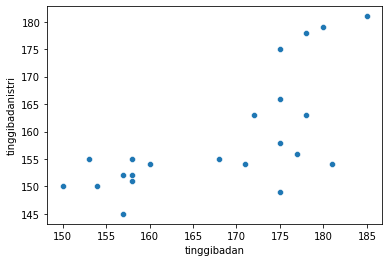

In [ ]:
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', data=df)
plt.show()

Linkage : ward

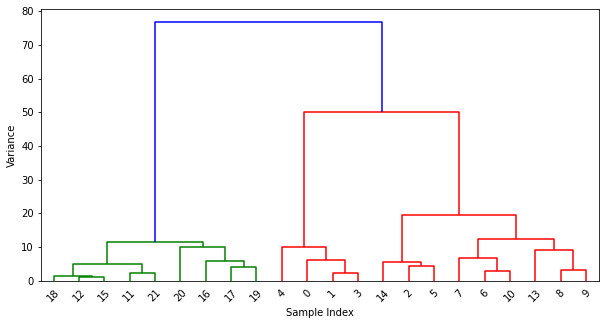

In [ ]:
ward = linkage(df, 'ward')

plt.figure(figsize=(10,5))
dendrogram(ward)
plt.xlabel('Sample Index')
plt.ylabel('Variance')
plt.show()

Linkage : Average

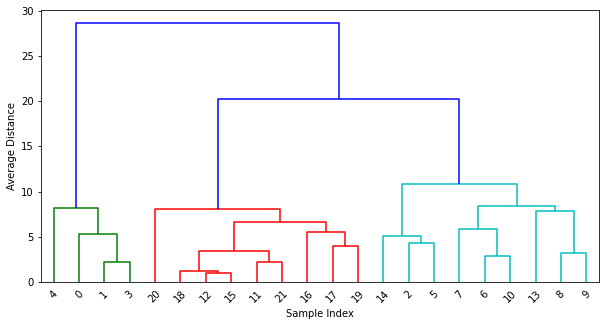

In [ ]:
avg = linkage(df, 'average')

plt.figure(figsize=(10,5))
dendrogram(avg)
plt.xlabel('Sample Index')
plt.ylabel('Average Distance')
plt.show()

Linkage : Complete

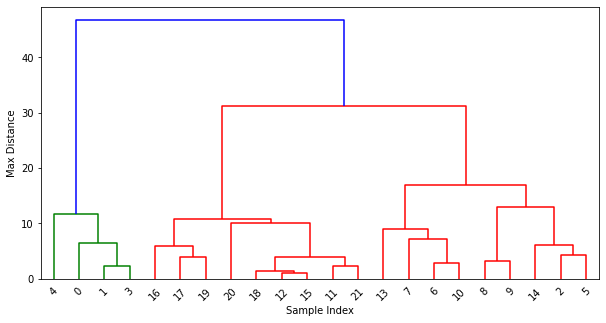

In [ ]:
complete = linkage(df, 'complete')

plt.figure(figsize=(10,5))
dendrogram(complete)
plt.xlabel('Sample Index')
plt.ylabel('Max Distance')
plt.show()

Agglomerative Clustering & Plot Best Cluster

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

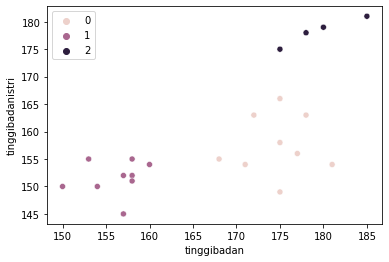

In [ ]:
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', data=df, hue=agglo.labels_)

### PYTHON EXERCISE : DBSCAN

Analyze data “ilustrasi k means.csv”
- plot the data using scatter plot
- make initial clustering
- determine the optimal hyperparameter
  - minimum sample per cluster 
  - epsilon
- plot the data and clustering result (optimal hyperparameter) using scatter plot

In [ ]:
df

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

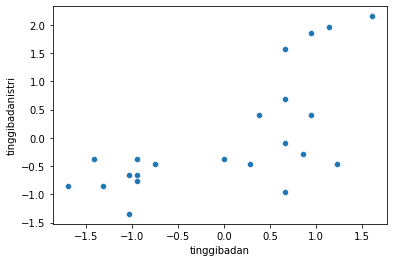

In [ ]:
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', data=df_scaled)
plt.show()

Optimize Parameter

In [ ]:
epsilon = [i/10 for i in range(5,8)]
min_samples = [i for i in range(2,6)]

In [ ]:
for e in epsilon:
  for s in min_samples:
    dbscan = DBSCAN(eps=e, min_samples=s)
    dbscan.fit(df)

    print('\neps ={}.'.format(e))
    print('min_sample ={}'.format(s))

    label = dbscan.fit_predict(df_scaled)
    print('score = {}'.format(silhouette_score(df_scaled, label)))




eps =0.5.
min_sample =2
score = 0.3956508603092504

eps =0.5.
min_sample =3
score = 0.35985247747971544

eps =0.5.
min_sample =4
score = 0.4422627452501292

eps =0.5.
min_sample =5
score = 0.4422627452501292

eps =0.6.
min_sample =2
score = 0.4618572923610629

eps =0.6.
min_sample =3
score = 0.4618572923610629

eps =0.6.
min_sample =4
score = 0.3901682187136734

eps =0.6.
min_sample =5
score = 0.35497113213899967

eps =0.7.
min_sample =2
score = 0.6161772649616482

eps =0.7.
min_sample =3
score = 0.6161772649616482

eps =0.7.
min_sample =4
score = 0.6161772649616482

eps =0.7.
min_sample =5
score = 0.6161772649616482


In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=3)
dbscan.fit(df_scaled)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

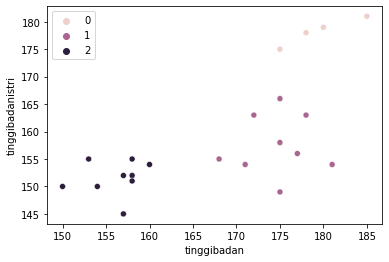

In [ ]:
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', data=df, hue=dbscan.labels_)
plt.show()